# Introduction
For those unacquainted, this is a jupyter notebook, a fairly popular and useful tool for interactive prototyping, data inspection, developing and documenting. Its content is partitioned into cells that can either contain markdown text or executable code, and further supports inline/in-cell vizualization of both plots and complex collections. 

The main purpose of this notebook is to provide a quick start for loading, processing and inspecting the data. Python-users  are free, and encouraged, to base their initial data exploration on this notebook, and everyone else are encouraged to take inspiration from the notebook when starting out in their language of choice. Particularly, the dataset placement and loading is important to get right in order to not check it into your own forked repositories. 

# Data placement and loading
We suggest that you clone/copy the dataset into your forked repositories.  
E.g., execute: <code>git clone git@github.com:sfi-norwai/2022_hackathon_hemsil2_dataset.git</code>  
when situated in the root directory of your forked repository, or use GitHub desktop etc. 

Ultimately, the provided *.gitignore* will ignore any directories named <code>2022_hackathon_hemsil2_dataset</code> within the repository, so as long as you name your data location accordingly, it can safely be placed within the forked repository. If you know what you are doing, you can always just keep the data outside of the repository or extend the gitignore to ignore other locations within it. 

In [124]:
from typing import Tuple
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.pipeline import make_pipeline


## Data path
**Note:** Modify the raw data path if you opt for not following the suggested placement

In [125]:
raw_data_path = '/home/krisbrud/repos/2022_hackathon_hemsil2_dataset'
data_dir = Path(raw_data_path)
data_dir

PosixPath('/home/krisbrud/repos/2022_hackathon_hemsil2_dataset')

## Load data
We use the python package pandas for loading the data

In [126]:
import pandas as pd
import numpy as np

In [127]:
data_path = data_dir / "hemsil2_datapoints_20102021.csv"
meta_data_path = data_dir / "ts_info.csv"

### Load data into pandas DataFrame

Load data points into DataFrame

In [128]:
def make_dataframe_from_file(data_path=data_path) -> pd.DataFrame:
    data_df = pd.read_csv(data_path, sep=',', parse_dates=True, index_col=0)
    return data_df

data_df = make_dataframe_from_file()

Load column meta data into Python dictionaries that can be indexed by column names

In [129]:
data_df.describe()

,flaevatn_ppt,hbv_hemsil2_inflow_pred_24h,flaevatn_temp,hbv_hemsil2_snow,hemsil2_inflow_corr,hbv_hemsil2_ground_water,hbv_hemsil2_soil_water,hbv_hemsil2_inflow_pred_48h,hbv_hemsil2_total_water,storeskar_inflow,storeskar_temp,hbv_hemsil2_snow_cover
count,105171.000000,105134.000000,105171.000000,105171.000000,105171.000000,105180.000000,105180.000000,105108.000000,104052.000000,105180.000000,102576.000000,104124.000000
mean,0.088415,15.120137,0.899179,97.063158,15.914241,24.010954,37.851188,14.982669,96.308494,4.146823,1.514413,65.825800
std,0.391047,20.190134,8.479834,105.175848,22.212225,25.818279,4.586184,19.736877,67.899853,6.175979,9.349730,44.198677
min,0.000000,0.000000,-35.340000,0.000000,-4.750000,0.110000,14.040000,0.000000,6.000000,0.110000,-38.120000,0.000000
25%,0.000000,2.517110,-4.230000,0.210000,3.090000,1.910000,36.120000,2.290000,36.490000,0.730000,-3.530000,5.960000
50%,0.000000,7.560000,1.313000,56.814234,7.880284,13.940000,38.940000,7.550000,76.025000,1.780000,1.910000,100.000000
75%,0.000000,20.040000,7.180000,170.895000,19.270000,40.220000,40.720000,20.311539,143.320000,4.660000,8.190000,100.000000
max,18.900000,201.160000,24.870000,375.090000,286.540000,113.670000,50.455629,178.180000,271.590000,81.910000,26.960000,100.000000


In [130]:
meta_data_df = pd.read_csv(meta_data_path, sep=',', index_col=0)
meta_data_dict = {record['name']: record for record in meta_data_df.to_dict('records')}
meta_data_dict

{'flaevatn_ppt': {'id': 224500448798060,
  'externalId': 'flaevatn_ppt',
  'name': 'flaevatn_ppt',
  'isString': False,
  'metadata': "{'prediction': 'false'}",
  'unit': 'mm',
  'assetId': 1473462549666207,
  'isStep': False,
  'securityCategories': '[]',
  'dataSetId': 1349361264490416,
  'createdTime': 1633594289762,
  'lastUpdatedTime': 1655361576439},
 'hbv_hemsil2_inflow_pred_24h': {'id': 3221784815662866,
  'externalId': 'hbv_hemsil2_inflow_pred_24h',
  'name': 'hbv_hemsil2_inflow_pred_24h',
  'isString': False,
  'metadata': "{'prediction': 'true', 'horizon': '24h'}",
  'unit': 'Q/h',
  'assetId': 1473462549666207,
  'isStep': False,
  'securityCategories': '[]',
  'dataSetId': 1349361264490416,
  'createdTime': 1635256682345,
  'lastUpdatedTime': 1655361577122},
 'flaevatn_temp': {'id': 3292601046790046,
  'externalId': 'flaevatn_temp',
  'name': 'flaevatn_temp',
  'isString': False,
  'metadata': "{'prediction': 'false'}",
  'unit': 'C',
  'assetId': 1473462549666207,
  'isSt

## Identify missing data
Loading the data points into a pandas DataFrame seems to have worked fine, but closer inspection reveals that all columns contain "null-values"

In [131]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105192 entries, 2010-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   flaevatn_ppt                 105171 non-null  float64
 1   hbv_hemsil2_inflow_pred_24h  105134 non-null  float64
 2   flaevatn_temp                105171 non-null  float64
 3   hbv_hemsil2_snow             105171 non-null  float64
 4   hemsil2_inflow_corr          105171 non-null  float64
 5   hbv_hemsil2_ground_water     105180 non-null  float64
 6   hbv_hemsil2_soil_water       105180 non-null  float64
 7   hbv_hemsil2_inflow_pred_48h  105108 non-null  float64
 8   hbv_hemsil2_total_water      104052 non-null  float64
 9   storeskar_inflow             105180 non-null  float64
 10  storeskar_temp               102576 non-null  float64
 11  hbv_hemsil2_snow_cover       104124 non-null  float64
dtypes: float64(12)
memory us

If we zoom in on some columns, we can notice some patterns in the missing data. E.g., flaevath_ppt, flaevatn_temp and other columns with 105171 non-null values are all NaN in most rows of the date 2021-09-14, while many of the remaining columns are consistenly NaN for the "skipped" hour when switching to daylight saving, e.g., storeskar_inflow. A few columns have a lot of missing values in the last months of the dataset

In [132]:
# Simple help function for extracting all rows where a given column has NaN values
def extract_null_df(df, column):
    return df[df[column].isnull()]

In [133]:
# Rerun cell with different column names to inspect rows where said column is null
column_name = 'storeskar_inflow'
null_rows = extract_null_df(data_df, column_name)
null_rows

,flaevatn_ppt,hbv_hemsil2_inflow_pred_24h,flaevatn_temp,hbv_hemsil2_snow,hemsil2_inflow_corr,hbv_hemsil2_ground_water,hbv_hemsil2_soil_water,hbv_hemsil2_inflow_pred_48h,hbv_hemsil2_total_water,storeskar_inflow,storeskar_temp,hbv_hemsil2_snow_cover
2010-10-31 01:00:00,0.0,10.24,0.90,15.01,11.18,16.35,40.95,10.08,47.13,NaN,3.70,100.00
2011-10-30 01:00:00,0.0,12.51,3.50,8.73,10.11,20.05,38.90,14.31,41.77,NaN,1.25,100.00
2012-10-28 01:00:00,0.0,4.23,-6.56,26.73,2.04,11.18,38.27,5.20,47.92,NaN,-11.51,100.00
2013-10-27 01:00:00,0.0,17.89,1.89,27.23,17.15,16.12,38.11,17.89,53.70,NaN,0.12,100.00
2014-10-26 01:00:00,0.0,39.39,4.27,21.21,39.79,32.79,38.65,29.68,55.22,NaN,5.28,98.73
2015-10-25 01:00:00,0.1,7.13,3.13,0.12,4.84,16.57,37.48,6.46,30.01,NaN,1.85,100.00
2016-10-30 01:00:00,0.0,6.15,-0.15,11.80,3.40,9.72,37.19,6.33,36.99,NaN,0.86,100.00
2017-10-29 01:00:00,0.0,14.65,-1.07,39.63,15.63,17.11,40.38,12.00,59.44,NaN,0.14,100.00
2018-10-28 01:00:00,0.0,5.36,-11.36,3.50,4.74,21.80,40.38,4.65,32.81,NaN,-12.04,100.00
2019-10-27 01:00:00,0.0,21.83,-6.35,12.58,21.78,24.24,38.04,19.69,44.13,NaN,-8.90,100.00


## Handling missing data
In real-world data, you have to expect some missing data. These may be caused by a myriad of issues like downtimes of sensors, communication and databases etc. There are multiple ways of handling such issues, each with their own sets of pros and cons. 

We provide an optional process for filling in all missing data points below

### [OPTIONAL] Simple removal of missing data
Given the observations above, a simple idea is to simply drop all data after a cut-off point beginning with the problematic date 2021-09-14, as this only makes out a couple of months out of 12 years of data. The remaining NaNs are exclusively caused by the switch to daylight saving and the entire timestamp does not really exist within the timezone. As long as the dataset does not provide absolute timestamps, the simplest course of action is likely to just fill in the NaNs using linear interpolation or back/front fill. **Note:** That the raw data likely has overwritten datapoints when switching from daylight saving in the autumn as well. All in all, these two abnormalities should not affect any models too much, and if you do not want to spend time on more advanced processing, it should be safe to use this.

Drop all data after 2021-09-13

In [134]:
failure_timestamp = pd.Timestamp(year=2021, month=9, day=1)
def drop_rows_after_timestamp(df: pd.DataFrame, timestamp: pd.Timestamp = failure_timestamp) -> pd.DataFrame:
    return data_df[data_df.index < timestamp]


# data_df = data_df[data_df.index < ]
data_df = drop_rows_after_timestamp(data_df, failure_timestamp)


In [135]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102264 entries, 2010-01-01 00:00:00 to 2021-08-31 23:00:00
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   flaevatn_ppt                 102264 non-null  float64
 1   hbv_hemsil2_inflow_pred_24h  102254 non-null  float64
 2   flaevatn_temp                102264 non-null  float64
 3   hbv_hemsil2_snow             102264 non-null  float64
 4   hemsil2_inflow_corr          102264 non-null  float64
 5   hbv_hemsil2_ground_water     102252 non-null  float64
 6   hbv_hemsil2_soil_water       102252 non-null  float64
 7   hbv_hemsil2_inflow_pred_48h  102252 non-null  float64
 8   hbv_hemsil2_total_water      102252 non-null  float64
 9   storeskar_inflow             102253 non-null  float64
 10  storeskar_temp               102264 non-null  float64
 11  hbv_hemsil2_snow_cover       102252 non-null  float64
dtypes: float64(12)
memory us

Fill NaNs caused by switching to daylight saving using linear interpolation

In [136]:
def fill_nans_with_linear_interpolation(df: pd.DataFrame) -> pd.DataFrame:
    df = df.interpolate(method='linear')
    return df

data_df = data_df.interpolate(method='linear')


In [137]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102264 entries, 2010-01-01 00:00:00 to 2021-08-31 23:00:00
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   flaevatn_ppt                 102264 non-null  float64
 1   hbv_hemsil2_inflow_pred_24h  102264 non-null  float64
 2   flaevatn_temp                102264 non-null  float64
 3   hbv_hemsil2_snow             102264 non-null  float64
 4   hemsil2_inflow_corr          102264 non-null  float64
 5   hbv_hemsil2_ground_water     102264 non-null  float64
 6   hbv_hemsil2_soil_water       102264 non-null  float64
 7   hbv_hemsil2_inflow_pred_48h  102264 non-null  float64
 8   hbv_hemsil2_total_water      102264 non-null  float64
 9   storeskar_inflow             102264 non-null  float64
 10  storeskar_temp               102264 non-null  float64
 11  hbv_hemsil2_snow_cover       102264 non-null  float64
dtypes: float64(12)
memory us

**Note:** A more intricate processing where only larger chunks of missing data are removed, while keeping track of the valid intervals is likely better. It would probably also be better to convert all times to UTC to avoid daylight saving issues, but you will then have to handle the overwritted hour in the autumn (interpolation etc)

# Data exploration

In [138]:
from scipy.sparse import data
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


data_set = data_df.copy()
data_set["year"] = data_set.index.year.values
data_set.describe()
data_features = [
    'year', 
    'hbv_hemsil2_inflow_pred_24h', 
    'hbv_hemsil2_inflow_pred_48h',
    "hemsil2_inflow_corr",
]


In [ ]:
#relationship analysis
correlation = data_df.corr()
#plt.figure(figsize = (10,10), dpi=70)

plt.figure(figsize = (10,10), dpi=70)
heatmap_corr =sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, linewidth=.5)

plt.figure().savefig('heatmap_corr.png', dpi=60, pad_inches=0.01)

In [ ]:
# Plot by year 
data_set_year = data_df.copy()
data_set["year"] = data_set.index.year.values
data_set["month"] = data_set.index.month.values
data_set["day"] = data_set.index.day.values
data_set["hour"] = data_set.index.hour.values
data_features2 = [
    'year', 
    'month',
    'day',
    'hour',
    "hemsil2_inflow_corr",
]

#data_set[data_features2]
sns.lineplot(data=data_set[data_features2], x='month', y="hemsil2_inflow_corr", hue ='year')

# Preprocessing

In [139]:
#dropping missing values
data_df = data_df.dropna(axis=0)

#selecting the prediction variable 
y = data_df.hemsil2_inflow_corr

#chosing features
data_features = ['flaevatn_ppt', 'flaevatn_temp', 'hbv_hemsil2_snow', 'hbv_hemsil2_ground_water', 'hbv_hemsil2_soil_water', 'hbv_hemsil2_total_water', 'storeskar_temp', 'hbv_hemsil2_snow_cover', 'hbv_hemsil2_inflow_pred_24h', 'hbv_hemsil2_inflow_pred_48h']

X = data_df[data_features]

def get_first_year_in_dataset(df: pd.DataFrame) -> int:
   """Get the first year present in the dataset"""
   year = df.iloc[0].name.year 

def get_last_year_in_dataset(df: pd.DataFrame) -> int:
   """Get the first year present in the dataset"""
   year = df.iloc[0].name.year

first_year = get_first_year_in_dataset(data_df)
last_year = get_last_year_in_dataset(data_df)

test_year = first_year


def split_by_year(df: pd.DataFrame, test_year: int):
   """Split the dataset into a test set of every sample in the year `test_year`, and a training set containing the rest. 
   
   Returns
   -------
   df_train, df_test: pd.DataFrame 
   """
   # Cross validation by leaving out one year at a time, training on the rest
   year_first_date = f"{test_year}-01-01"
   next_year_first_date = f"{test_year + 1}-01-01"
   
   # Year is every time after first year and strictly before first day next year
   test_period_mask = (year_first_date <= df.index) & (df.index < next_year_first_date)

   # Extract the relevant data points
   df_train = df[~test_period_mask]
   df_test = df[test_period_mask]
   print("df_train len", len(df_train)) 
   print("df_test len", len(df_test)) 
   return df_train, df_test



## One-hot encoding of months

As we see fairly large seasonal variations, we wish to incorporate information about the month into the features. We accomplish this by applying one-hot encoding.

In [140]:
def add_one_hot_month_categorical(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()  # Avoid overwriting original data
    df["month"] = df.index.month.values
    df_with_one_hot = pd.get_dummies(df, columns=["month"])
    
    return df_with_one_hot

df = add_one_hot_month_categorical(data_df)
df


,flaevatn_ppt,hbv_hemsil2_inflow_pred_24h,flaevatn_temp,hbv_hemsil2_snow,hemsil2_inflow_corr,hbv_hemsil2_ground_water,hbv_hemsil2_soil_water,hbv_hemsil2_inflow_pred_48h,hbv_hemsil2_total_water,storeskar_inflow,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
2010-01-01 00:00:00,0.0,0.85,-9.65,154.41,2.00,0.73,31.53,0.28,123.03,0.52,...,0,0,0,0,0,0,0,0,0,0
2010-01-01 01:00:00,0.0,0.80,-9.20,154.41,2.00,0.73,31.53,0.28,123.03,0.52,...,0,0,0,0,0,0,0,0,0,0
2010-01-01 02:00:00,0.0,0.75,-8.82,154.41,2.00,0.73,31.53,0.27,123.03,0.52,...,0,0,0,0,0,0,0,0,0,0
2010-01-01 03:00:00,0.0,0.73,-11.20,154.41,2.00,0.73,31.53,0.27,123.03,0.52,...,0,0,0,0,0,0,0,0,0,0
2010-01-01 04:00:00,0.1,0.70,-12.48,154.56,2.00,0.73,31.53,0.27,123.12,0.52,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-31 19:00:00,0.0,3.64,14.90,0.00,3.15,20.11,26.58,2.78,19.39,1.59,...,0,0,0,0,0,1,0,0,0,0
2021-08-31 20:00:00,0.0,3.65,12.82,0.00,3.53,20.05,26.55,2.76,19.35,1.59,...,0,0,0,0,0,1,0,0,0,0
2021-08-31 21:00:00,0.0,3.65,12.90,0.00,3.75,20.00,26.53,2.74,19.32,1.58,...,0,0,0,0,0,1,0,0,0,0
2021-08-31 22:00:00,0.0,3.65,11.76,0.00,3.66,19.94,26.50,2.73,19.28,1.58,...,0,0,0,0,0,1,0,0,0,0


In [141]:
def add_lagged_observations_for_column(df: pd.DataFrame, column_name: str, lag: int):
    if lag < 0:
        raise ValueError("Lag must be positive. Looking at future inputs is not allowed!")
    
    lagged_observation_key = column_name + f"_lagged_{lag}_hours"

    df[lagged_observation_key] = df[column_name].shift(lag)
    
    return df  # Operation is done in-place, but we return the df anyways.


# Model training

In [142]:
from typing import List, Any
from dataclasses import dataclass
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn import neighbors
from collections import OrderedDict
from sklearn import linear_model


def make_models() -> List[Any]:
    n_neighbors = 7
    models = OrderedDict()
    models["linreg"] = linear_model.LinearRegression()
    models["linreg_lasso"] = linear_model.Lasso(alpha=0.5)
    models["linreg_ridge"] = linear_model.Ridge(alpha=0.1)
    models["pcr"] = make_pipeline(PCA(n_components=3), linear_model.LinearRegression())

    # Apply StandardScaler before every model
    for key, model in models.items():
        models[key] = make_pipeline(StandardScaler(), model) 

    return models



# Evaluation

In [143]:
# TODO: MSE (Mean Square Error) and MAE (Mean Absolute Error)
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import numpy as np
def calculate_mse(y_pred, y_true) -> float:
    """Calculates the Mean Squared Error"""
    return mean_squared_error(y_true, y_pred)

def calculate_mae(y_pred, y_true) -> float:
    """Calculates the Mean Absolute Error"""
    return mean_absolute_error(y_true, y_pred)

def calculate_bias(y_pred, y_true) -> float:
    """Calculates the sum of errors, i.e. the accumulated bias of the method"""
    bias = np.sum(np.array(y_pred) - np.array(y_true))
    return bias



# Putting it all together

In [144]:
## Preprocessing
# Load the dataset from file
df = make_dataframe_from_file()

# Drop rows after problems
df = drop_rows_after_timestamp(df)

# Fill NaNs from switching to daylight savings by linear interpolation ("lerp")
df = fill_nans_with_linear_interpolation(df)

# Add one-hot categorical of month to make representing seasonal differences easier
df = add_one_hot_month_categorical(df)

# Add lagged observations for upstream river.
# It is said to be lagged by ~6 hours, so we add from 4 to 8 hours
for lag in range(4, 8 + 1):
    df = add_lagged_observations_for_column(df, "storeskar_inflow", lag)

# Drop the first values of the first year (as the lagged observations introduced NaNs)
df = df.dropna(axis=0)

df.describe()

,flaevatn_ppt,hbv_hemsil2_inflow_pred_24h,flaevatn_temp,hbv_hemsil2_snow,hemsil2_inflow_corr,hbv_hemsil2_ground_water,hbv_hemsil2_soil_water,hbv_hemsil2_inflow_pred_48h,hbv_hemsil2_total_water,storeskar_inflow,...,month_8,month_9,month_10,month_11,month_12,storeskar_inflow_lagged_4_hours,storeskar_inflow_lagged_5_hours,storeskar_inflow_lagged_6_hours,storeskar_inflow_lagged_7_hours,storeskar_inflow_lagged_8_hours
count,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,...,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000,102256.000000
mean,0.088311,15.239491,0.922608,99.232100,16.069408,24.419029,37.710363,15.091803,97.424370,4.159537,...,0.087310,0.077453,0.080034,0.077453,0.080034,4.159496,4.159485,4.159475,4.159464,4.159453
std,0.390808,20.337735,8.503637,105.782945,22.399950,26.022023,4.234166,19.875856,67.957568,6.214030,...,0.282291,0.267310,0.271348,0.267310,0.271348,6.214051,6.214056,6.214061,6.214067,6.214072
min,0.000000,0.000000,-35.340000,0.000000,-3.370000,0.110000,14.040000,0.000000,6.000000,0.110000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.110000,0.110000,0.110000,0.110000
25%,0.000000,2.530000,-4.220000,0.240000,3.120000,1.880000,36.120000,2.290000,36.800000,0.710000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.710000,0.710000,0.710000,0.710000,0.710000
50%,0.000000,7.600000,1.310000,64.270000,7.970000,14.510000,38.940000,7.580000,79.145000,1.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.760000,1.760000,1.760000,1.760000,1.760000
75%,0.000000,20.270000,7.250000,174.262500,19.510000,40.900000,40.620000,20.540000,144.330000,4.680000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.680000,4.680000,4.680000,4.680000,4.680000
max,18.900000,201.160000,24.870000,375.090000,286.540000,113.670000,42.120000,178.180000,271.590000,81.910000,...,1.000000,1.000000,1.000000,1.000000,1.000000,81.910000,81.910000,81.910000,81.910000,81.910000


In [145]:
metric_evaluators = {
    "Mean Squared Error": calculate_mse, 
    "Mean Absolute Error": calculate_mae,
    "Bias": calculate_bias,
}


first_test_year = 2010
last_test_year = 2020
target_column_name = "hemsil2_inflow_corr"

def split_x_y(df, target_column) -> Tuple[pd.DataFrame, pd.DataFrame]:
    y = df[target_column_name]
    x = df.drop(columns=[target_column_name])
    return x, y

result_list = []

for test_year in range(first_test_year, last_test_year + 1):
    df_train, df_test = split_by_year(df, test_year)
    x_train, y_train = split_x_y(df_train, target_column_name)
    x_test, y_test = split_x_y(df_test, target_column_name)
    
    models = make_models()

    for model_name, model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        print(model_name)
        for name, evaluator in metric_evaluators.items():
            metric = evaluator(y_pred, y_test)
            print(name, metric)
            result_list.append({
                "model": model_name,
                "test_year": test_year,
                "metric_name": name,
                "metric_value": metric,
            })


df_train len 93504
df_test len 8752
linreg
Mean Squared Error 20.546274412448035
Mean Absolute Error 2.1127959320763465
Bias -2166.9793071321205
linreg_lasso
Mean Squared Error 25.653730984897116
Mean Absolute Error 2.095873621891192
Bias -6952.078582580772
linreg_ridge
Mean Squared Error 20.54709028430099
Mean Absolute Error 2.1125895254299696
Bias -2171.206746218846
pcr
Mean Squared Error 40.6579179215586
Mean Absolute Error 3.366400325104231
Bias -18435.994818171526
df_train len 93496
df_test len 8760
linreg
Mean Squared Error 45.464305482194966
Mean Absolute Error 3.361327057515669
Bias -18274.378091874005
linreg_lasso
Mean Squared Error 54.37954661691528
Mean Absolute Error 3.3186432252854026
Bias -12561.039826241047
linreg_ridge
Mean Squared Error 45.46636498936078
Mean Absolute Error 3.361285870509654
Bias -18274.922211751902
pcr
Mean Squared Error 66.48233958169828
Mean Absolute Error 4.237533249133163
Bias -16640.099742376206
df_train len 93472
df_test len 8784
linreg
Mean Squ

Mean:
                                  metric_value
model        metric_name                      
linreg       Bias                 -1373.609342
             Mean Absolute Error      2.425132
             Mean Squared Error      20.154927
linreg_lasso Bias                 -1517.194312
             Mean Absolute Error      2.455207
             Mean Squared Error      23.470067
linreg_ridge Bias                 -1384.428539
             Mean Absolute Error      2.424558
             Mean Squared Error      20.152524
pcr          Bias                 -2848.304292
             Mean Absolute Error      3.572138
             Mean Squared Error      36.991567
Std:
                                  metric_value
model        metric_name                      
linreg       Bias                  6984.258010
             Mean Absolute Error      0.389451
             Mean Squared Error       9.779461
linreg_lasso Bias                  6442.974459
             Mean Absolute Error      0.399074
  

<AxesSubplot:xlabel='model', ylabel='metric_value'>

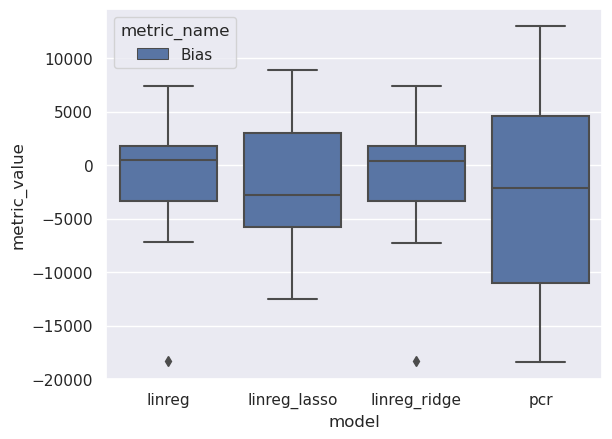

In [146]:
results_df = pd.DataFrame(result_list)
results_df_grouped = results_df[["model", "metric_name", "metric_value"]].groupby(["model", "metric_name"])

print("Mean:")
print(results_df_grouped.mean())
print("Std:")
print(results_df_grouped.std())
print("Min:")
print(results_df_grouped.min())
print("Max:")
print(results_df_grouped.max())

sns.set_theme(style="darkgrid")
sns.boxplot(data=results_df[results_df["metric_name"] == "Bias"], x="model", y="metric_value", hue="metric_name")

<AxesSubplot:xlabel='model', ylabel='metric_value'>

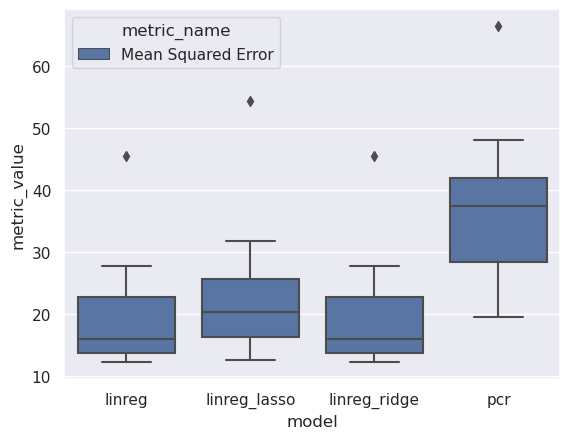

In [147]:
sns.boxplot(data=results_df[results_df["metric_name"] == "Mean Squared Error"], x="model", y="metric_value", hue="metric_name")

<AxesSubplot:xlabel='model', ylabel='metric_value'>

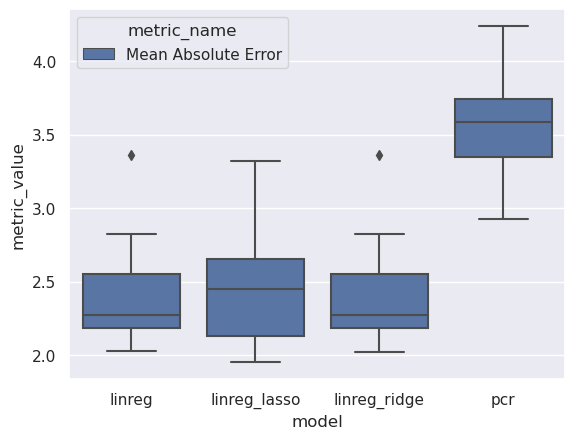

In [148]:
sns.boxplot(data=results_df[results_df["metric_name"] == "Mean Absolute Error"], x="model", y="metric_value", hue="metric_name")